# <a name="0">Image Classification With Neural Network</a>

1. <a href="#1">Data Processing</a>
2. <a href="#2">Build DataSet</a>
3. <a herf="#3">Build CNN</a>
4. <a herf="#4">Loss&Optimizer</a>
5. <a herf="#5">Training&Testing</a>

This demo will help to build your own Image Classifier with the example of Bagel-Donut Classifier.

### 1. <a name="1">Data Processing</a>

- Locate the path to the image-dataset folder
- Transformation & Transportation
- Labeling

In [1]:
#Importing the libraries
import glob
import torch
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
import torchvision
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
all_imgs_path = glob.glob(r'./image_data/*/*.png')
print(all_imgs_path[:20])
print("Numbers of All Samples: ",len(all_imgs_path))

['./image_data\\bagel_images\\bagel100.png', './image_data\\bagel_images\\bagel101.png', './image_data\\bagel_images\\bagel102.png', './image_data\\bagel_images\\bagel103.png', './image_data\\bagel_images\\bagel104.png', './image_data\\bagel_images\\bagel105.png', './image_data\\bagel_images\\bagel106.png', './image_data\\bagel_images\\bagel107.png', './image_data\\bagel_images\\bagel108.png', './image_data\\bagel_images\\bagel109.png', './image_data\\bagel_images\\bagel110.png', './image_data\\bagel_images\\bagel111.png', './image_data\\bagel_images\\bagel112.png', './image_data\\bagel_images\\bagel113.png', './image_data\\bagel_images\\bagel114.png', './image_data\\bagel_images\\bagel115.png', './image_data\\bagel_images\\bagel116.png', './image_data\\bagel_images\\bagel117.png', './image_data\\bagel_images\\bagel118.png', './image_data\\bagel_images\\bagel119.png']
Numbers of All Samples:  1511


In [3]:
#Set Labels
species = ['bagel','donut']
species_to_id = dict((c, i) for i, c in enumerate(species))
id_to_species = dict((v, k) for k, v in species_to_id.items())
print(id_to_species)
all_labels = []
#iter through the path of the image
for img in all_imgs_path:
    # Classify each img should be on which label
    for i, c in enumerate(species):
        if c in img:
            all_labels.append(i)
print(all_labels[:100]) #Get All labels

{0: 'bagel', 1: 'donut'}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### <a name="1">Transpose the data</a>

Transform all photos to the same size: "96 * 96"
and then making sure they are all between the tensor[-1,1]

In [4]:
transform = transforms.Compose([
                transforms.Resize((96,96)), 
                transforms.ToTensor(), 
                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

### 2. <a name="2">Build Dataset</a>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 96, 96])


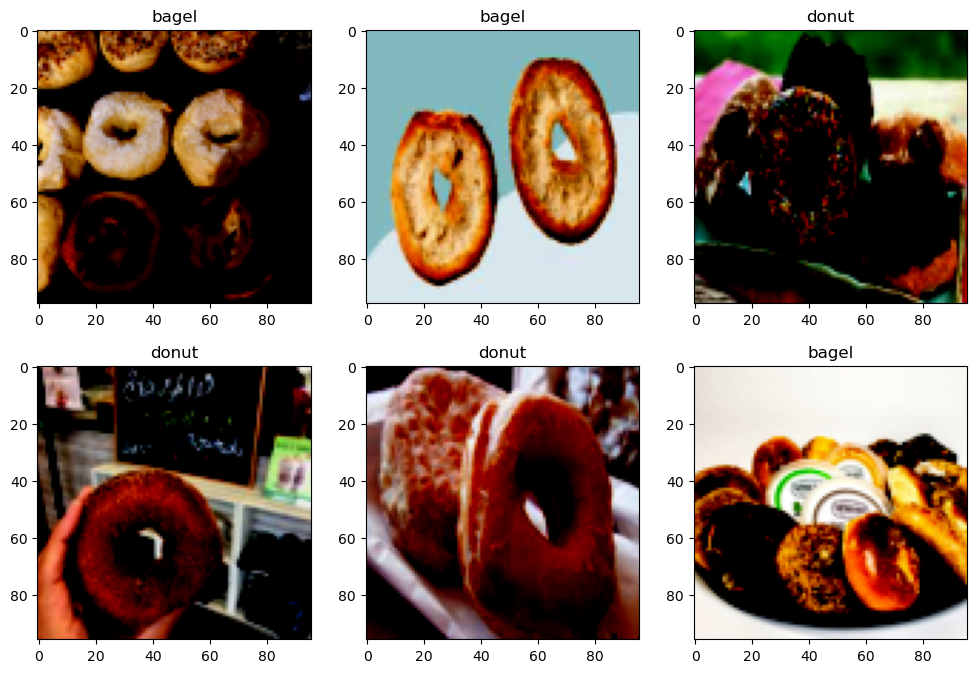

In [5]:
class DataSetClass(data.Dataset):
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = labels
        self.transforms = transform
    def __getitem__(self, index):               
        img = self.imgs[index]                  #Slice the data according to the index, and then return the data -> to tensor
        label = self.labels[index]
        pil_img = Image.open(img).convert('RGB')             
        data = self.transforms(pil_img)
        return data, label
    def __len__(self):
        return len(self.imgs)

BATCH_SIZE = 10
food_dataset = DataSetClass(all_imgs_path, all_labels, transform)
food_datalodaer = data.DataLoader(
                            food_dataset,
                            batch_size=BATCH_SIZE,
                            shuffle=True
)
#Visulize the data
imgs_batch, labels_batch = next(iter(food_datalodaer))
print(imgs_batch.shape)

plt.figure(figsize=(12, 8))
for i, (img, label) in enumerate(zip(imgs_batch[:6], labels_batch[:6])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(id_to_species.get(label.item()))
    plt.imshow(img)
plt.show()

#### <a name="1">Split Train Set and Test Set</a>
80% Training and 20% Testing

In [6]:
index = np.random.permutation(len(all_imgs_path))

all_imgs_path = np.array(all_imgs_path)[index]
all_labels = np.array(all_labels)[index]
print("Total Number of Samples: ",len(all_imgs_path))
#80% as train
s = int(len(all_imgs_path)*0.8)
print("Numbers of Pic for the Training Set: ",s)

train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]

trainset = DataSetClass(train_imgs, train_labels, transform) #TrainSet TensorData
testset = DataSetClass(test_imgs, test_labels, transform) #TestSet TensorData
trainloader = data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)#TrainSet Labels
testloader = data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)#TestSet Labels

Total Number of Samples:  1511
Numbers of Pic for the Training Set:  1208


### 3. <a name="3">Define a Conv Neural Network</a>

- bself.conv1: a 2D convolutional layer with 3 input channels, 6 output channels, and a 5x5 kernel size.
- self.pool: a 2D max-pooling layer with a 2x2 pooling window.
- self.conv2: another 2D convolutional layer with 6 input channels, 16 output channels, and a 5x5 kernel size.
- self.fc1: a fully connected linear layer (fc stands for fully connected) with 120 output units.
- self.fc2: another fully connected linear layer with 84 output units.
- self.fc3: a final fully connected linear layer with 2 output units.

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 21 * 21, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 16 * 21 * 21)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

#### <a name="1">Define a loss function and an optimizer</a>

In [8]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

#### <a name="1">Training</a>
Note: If you are using a windows laptop, and have installed torch GPU version, use the line 

```
    inputs, labels = inputs.to(device), labels.to(device)
    labels = labels.type(torch.LongTensor).to(device)
```
This is intended to ensure data is on it correct platform

In [9]:
for epoch in range(5):  # loop over the dataset multiple times
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs, labels
        if device.type == 'cuda':
            inputs, labels = inputs.to(device), labels.to(device)
        labels = labels.type(torch.LongTensor).to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(loss)
print('Finished Training')

tensor(0.6984, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7770, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6930, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6984, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7121, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6413, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7309, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6593, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6535, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6794, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7319, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7076, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7017, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7056, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6963, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6997, device='cuda:0', grad_fn=

d:\Anaconda\envs\kaggle\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


tensor(0.7241, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5686, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6937, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7350, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6157, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6287, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7649, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6147, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6587, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7588, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6865, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7225, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6631, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7246, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.6236, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.5703, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.7040, device='cuda:0', grad_fn=

#### <a name="1">Testing Accuracy

Note: If you are using a windows laptop, and have installed torch GPU version, use the line 


```
    images = images.to(device)
    inputs, labels = inputs.to(device), labels.to(device)
```

This is intended to ensure data is on it correct platform

In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if device.type == 'cuda':
            images = images.to(device)
            inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 65 %


### 4.<a name="1">Visulization</a>

Note: If you are using a windows laptop, and have installed torch GPU version, use the line 

```
img = img.to(device)
```
This is intended to ensure data is on it correct platform

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 96, 96])
tensor([0], device='cuda:0')


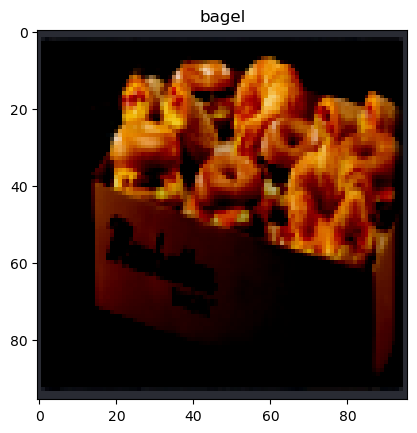

In [13]:
#show result
import random
imgs_batch, labels_batch = next(iter(testloader))
print(imgs_batch.shape)
index0 = random.randint(0,31)
img,label = imgs_batch[0], labels_batch[0]
# if device == 'cuda':
#     img = img.to(device) # -> tensor
img = img.to(device)
outputs = net(img)
_, predicted = torch.max(outputs.data, 1)
print(predicted)
img = img.cpu()
img = img.permute(1, 2, 0).numpy()
# plt.subplot(2, 3)
plt.title(id_to_species.get(label.item()))
plt.imshow(img)
plt.show()

In [ ]:
# imgs_batch, labels_batch = next(iter(testloader))
# print(imgs_batch.shape)

# plt.figure(figsize=(12, 8))
# for i, (img, label) in enumerate(zip(imgs_batch[:6], labels_batch[:6])):
#     outputs = net(img)
#     _, predicted = torch.max(outputs.data, 1)
#     if predicted.item() == 0:
#         print("Bagel", end=" ")
#     else:
#         print("Donut", end=" ")
#     img = img.permute(1, 2, 0).numpy()
#     plt.subplot(2, 3, i+1)
#     plt.title(id_to_species.get(label.item()))
#     plt.imshow(img)
# plt.show()